<a href="https://colab.research.google.com/github/Faridef/Faridef/blob/main/Assesment_FDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from scipy import stats

In [32]:
df = pd.read_excel('use_drug.xlsx')
df 

,classification,report_date,city,distribution_pattern,openfda_brand_name,openfda_generic_name,state
0,Class III,2012-06-20 00:00:00,Chadds Ford,Nationwide and Puerto Rico,NaN,NaN,PA
1,Class II,2012-06-20 00:00:00,Miami,Nationwide and Puerto Rico.,NaN,NaN,FL
2,Class II,2012-06-20 00:00:00,Miami,Nationwide and Puerto Rico.,NaN,NaN,FL
3,Class II,2012-06-20 00:00:00,Miami,Nationwide and Puerto Rico.,NaN,NaN,FL
4,Class II,2012-06-20 00:00:00,Bedford,Nationwide and Puerto Rico.,NaN,NaN,OH
...,...,...,...,...,...,...,...
7385,Class II,2018-02-21 00:00:00,Cary,Distributed Nationwide in the USA and Puerto R...,NaN,NaN,IL
7386,Class II,2018-02-21 00:00:00,Cary,Distributed Nationwide in the USA and Puerto R...,NaN,NaN,IL
7387,Class II,2018-02-21 00:00:00,Cary,Distributed Nationwide in the USA and Puerto R...,NaN,NaN,IL
7388,Class II,2018-02-21 00:00:00,Cary,Distributed Nationwide in the USA and Puerto R...,NaN,NaN,IL


In [33]:
# Kasus penyalahgunaan Narkoba pada Negara Bagian saya ambil 10 teratas 
df_state = df['state'].value_counts()
df_10_teratas = df_state.head(10)
df_10_teratas

IL    873
FL    848
TN    749
WA    740
NJ    581
CA    494
NY    298
AR    277
PA    267
TX    261
Name: state, dtype: int64

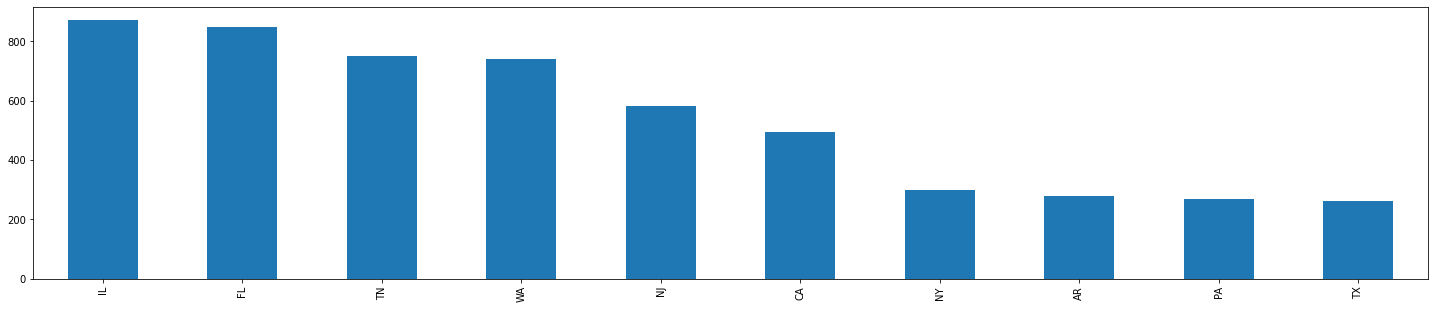

In [34]:
# Grafik kasus penyalahgunaan Narkoba pada 10 Negara Bagian teratas
df_10_teratas.plot.bar(                    
     figsize=(25,5)
)

# Negara terbanyak penyalahgunaan Narkoba Yaitu IL dengan Jumlah 873 kasus 

In [35]:

df.groupby('state').count()

,classification,report_date,city,distribution_pattern,openfda_brand_name,openfda_generic_name
state,,,,,,
AL,137,137,137,137,3,3
AR,277,277,277,277,0,0
AZ,122,122,122,122,1,1
CA,494,494,494,494,33,33
CO,16,16,16,16,6,6
CT,16,16,16,16,7,7
DE,6,6,6,6,4,4
FL,848,848,848,848,70,70
GA,81,81,81,81,5,5


In [36]:
# 5 kota tertinggi Kasus Penyalahgunaan Narkoba
df_city = df['city'].value_counts()
df_city_5 = df_city.head(5)
df_city_5

Vancouver      538
Knoxville      382
Lake Forest    344
Ocala          325
Newbern        299
Name: city, dtype: int64

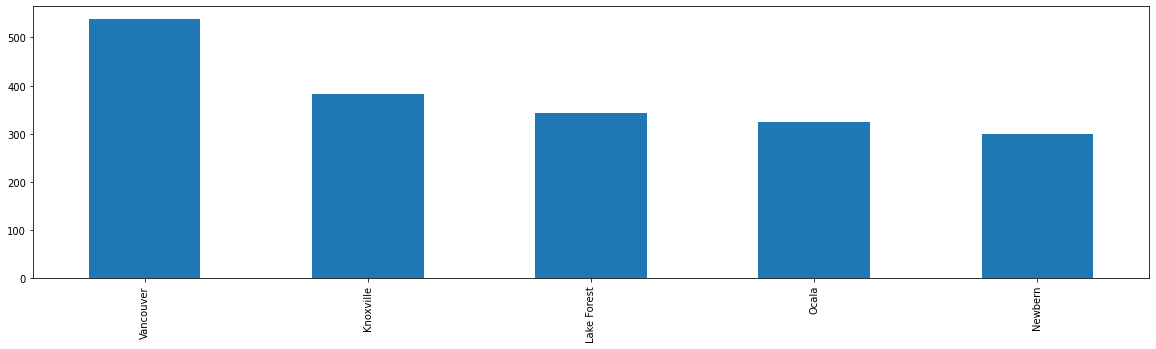

In [37]:
#grafik 5 kota
df_city_5.plot.bar(figsize=(20,5))

In [38]:
#Jenis Narkoba yang tinggi peredarannya
df_jenis = df['openfda_brand_name'].value_counts()
df_jenis = df_jenis.head(10)
df_jenis

SODIUM CHLORIDE                                 38
LEVOXYL                                         23
DAYTRANA                                        21
DEXTROSE                                        15
ATORVASTATIN CALCIUM                            13
PROPOFOL                                        13
LISINOPRIL                                      12
AMLODIPINE BESYLATE AND ATORVASTATIN CALCIUM    11
FLUCONAZOLE                                     10
METOPROLOL SUCCINATE                             8
Name: openfda_brand_name, dtype: int64

In [39]:
df_group = df.groupby('state').count()
df_group


,classification,report_date,city,distribution_pattern,openfda_brand_name,openfda_generic_name
state,,,,,,
AL,137,137,137,137,3,3
AR,277,277,277,277,0,0
AZ,122,122,122,122,1,1
CA,494,494,494,494,33,33
CO,16,16,16,16,6,6
CT,16,16,16,16,7,7
DE,6,6,6,6,4,4
FL,848,848,848,848,70,70
GA,81,81,81,81,5,5


In [40]:
#
df_group['classification'].mean()

158.8695652173913

In [41]:
df_group['classification'].describe()

count     46.000000
mean     158.869565
std      237.102192
min        1.000000
25%       16.000000
50%       49.500000
75%      181.000000
max      873.000000
Name: classification, dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7390 entries, 0 to 7389
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   classification        7390 non-null   object
 1   report_date           7388 non-null   object
 2   city                  7387 non-null   object
 3   distribution_pattern  7385 non-null   object
 4   openfda_brand_name    976 non-null    object
 5   openfda_generic_name  976 non-null    object
 6   state                 7308 non-null   object
dtypes: object(7)
memory usage: 404.3+ KB


In [43]:
arr_a = df.to_numpy()

arr_IL = []
for i in range(len(arr_a)):
  if arr_a[i][-1] == 'IL':
    arr_IL.append(arr_a[i])

arr_IL

[array(['Class II', datetime.datetime(2012, 6, 20, 0, 0), 'Lake Forest',
        'Nationwide.', 'PROPOFOL', 'PROPOFOL', 'IL'], dtype=object),
 array(['Class II', datetime.datetime(2012, 6, 27, 0, 0), 'Abbott Park',
        'Nationwide', 'ZEMPLAR', 'PARICALCITOL', 'IL'], dtype=object),
 array(['Class III', datetime.datetime(2012, 6, 27, 0, 0), 'Lake Forest',
        'Nationwide', 'MAGNESIUM SULFATE IN WATER',
        'MAGNESIUM SULFATE IN WATER', 'IL'], dtype=object),
 array(['Class I', datetime.datetime(2012, 7, 25, 0, 0), 'Lake Forest',
        'Nationwide', nan, nan, 'IL'], dtype=object),
 array(['Class III', datetime.datetime(2012, 7, 25, 0, 0), 'Buffalo Grove',
        'Nationwide', 'CIPROFLOXACIN', 'CIPROFLOXACIN', 'IL'], dtype=object),
 array(['Class I', datetime.datetime(2012, 8, 15, 0, 0), 'Lake Forest',
        'Nationwide.', 'HYDROMORPHONE HYDROCHLORIDE',
        'HYDROMORPHONE HYDROCHLORIDE', 'IL'], dtype=object),
 array(['Class III', datetime.datetime(2012, 8, 22, 0, 0), 'L

In [44]:
df_il = pd.DataFrame(arr_IL)
df_il.columns = ['classification', 'report_date','city', 'distribution_pattern','openfda_brand_name', 'openfda_generic_name', 'state']
df_il

,classification,report_date,city,distribution_pattern,openfda_brand_name,openfda_generic_name,state
0,Class II,2012-06-20,Lake Forest,Nationwide.,PROPOFOL,PROPOFOL,IL
1,Class II,2012-06-27,Abbott Park,Nationwide,ZEMPLAR,PARICALCITOL,IL
2,Class III,2012-06-27,Lake Forest,Nationwide,MAGNESIUM SULFATE IN WATER,MAGNESIUM SULFATE IN WATER,IL
3,Class I,2012-07-25,Lake Forest,Nationwide,NaN,NaN,IL
4,Class III,2012-07-25,Buffalo Grove,Nationwide,CIPROFLOXACIN,CIPROFLOXACIN,IL
...,...,...,...,...,...,...,...
868,Class II,2018-02-21,Cary,Distributed Nationwide in the USA and Puerto R...,NaN,NaN,IL
869,Class II,2018-02-21,Cary,Distributed Nationwide in the USA and Puerto R...,NaN,NaN,IL
870,Class II,2018-02-21,Cary,Distributed Nationwide in the USA and Puerto R...,NaN,NaN,IL
871,Class II,2018-02-21,Cary,Distributed Nationwide in the USA and Puerto R...,NaN,NaN,IL


In [45]:
df_narkoba = df_il['openfda_generic_name'].value_counts().head(10)
df_narkoba = pd.DataFrame(df_narkoba)
df_narkoba.reset_index(level=0, inplace=True)
#inplace = mengganti data sebelumnya
df_narkoba.columns = ['openfda_generic_name', 'jumlah']
df_narkoba

,openfda_generic_name,jumlah
0,SODIUM CHLORIDE,37
1,PROPOFOL,13
2,BUPIVACAINE HYDROCHLORIDE,13
3,DEXTROSE MONOHYDRATE,11
4,KETOROLAC TROMETHAMINE,7
5,LIDOCAINE HYDROCHLORIDE,7
6,HYDROMORPHONE HYDROCHLORIDE,6
7,HEPARIN SODIUM,6
8,VANCOMYCIN HYDROCHLORIDE,5
9,LEUPROLIDE ACETATE,5


In [46]:
arr_df = df.to_numpy()
arr_mi = []
for i in range(len(arr_df)):
  if arr_df[i][2] == 'Miami':
    arr_mi.append(arr_df[i])
arr_mi

[array(['Class II', datetime.datetime(2012, 6, 20, 0, 0), 'Miami',
        'Nationwide and Puerto Rico.', nan, nan, 'FL'], dtype=object),
 array(['Class II', datetime.datetime(2012, 6, 20, 0, 0), 'Miami',
        'Nationwide and Puerto Rico.', nan, nan, 'FL'], dtype=object),
 array(['Class II', datetime.datetime(2012, 6, 20, 0, 0), 'Miami',
        'Nationwide and Puerto Rico.', nan, nan, 'FL'], dtype=object),
 array(['Class II', datetime.datetime(2012, 6, 20, 0, 0), 'Miami',
        'Nationwide and Puerto Rico.', 'DAYTRANA', 'METHYLPHENIDATE', 'FL'],
       dtype=object),
 array(['Class II', datetime.datetime(2012, 7, 18, 0, 0), 'Miami',
        'Nationwide and Puerto Rico', 'DAYTRANA', 'METHYLPHENIDATE', 'FL'],
       dtype=object),
 array(['Class II', datetime.datetime(2012, 8, 29, 0, 0), 'Miami', 'FL',
        nan, nan, 'FL'], dtype=object),
 array(['Class II', datetime.datetime(2012, 8, 29, 0, 0), 'Miami',
        'Nationwide and Puerto Rico.', 'DAYTRANA', 'METHYLPHENIDATE', 'FL']

In [47]:
df_mi = pd.DataFrame(arr_mi)
df_mi.columns = ['classification', 'report_date','city', 'distribution_pattern','openfda_brand_name', 'openfda_generic_name', 'state']
df_mi

,classification,report_date,city,distribution_pattern,openfda_brand_name,openfda_generic_name,state
0,Class II,2012-06-20,Miami,Nationwide and Puerto Rico.,NaN,NaN,FL
1,Class II,2012-06-20,Miami,Nationwide and Puerto Rico.,NaN,NaN,FL
2,Class II,2012-06-20,Miami,Nationwide and Puerto Rico.,NaN,NaN,FL
3,Class II,2012-06-20,Miami,Nationwide and Puerto Rico.,DAYTRANA,METHYLPHENIDATE,FL
4,Class II,2012-07-18,Miami,Nationwide and Puerto Rico,DAYTRANA,METHYLPHENIDATE,FL
5,Class II,2012-08-29,Miami,FL,NaN,NaN,FL
6,Class II,2012-08-29,Miami,Nationwide and Puerto Rico.,DAYTRANA,METHYLPHENIDATE,FL
7,Class II,2012-08-29,Miami,Nationwide and Puerto Rico.,DAYTRANA,METHYLPHENIDATE,FL
8,Class II,2012-08-29,Miami,Nationwide and Puerto Rico.,DAYTRANA,METHYLPHENIDATE,FL
9,Class II,2013-05-08,Miami,"Nationwide, Bahamas, and Turks & Caicos Islands",NaN,NaN,FL


In [48]:
df_narkoba = df_mi['openfda_generic_name'].value_counts().head(10)
df_narkoba = pd.DataFrame(df_narkoba)
df_narkoba.reset_index(level=0, inplace=True)
#inplace = mengganti data sebelumnya
df_narkoba.columns = ['openfda_generic_name', 'jumlah']
df_narkoba

,openfda_generic_name,jumlah
0,METHYLPHENIDATE,21
1,ESTRADIOL,2
